In [0]:
# !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'dashlink/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
# path = Path('Tail_687_1/png1'); path
# trnpath = Path(base_dir + 'Tail_687_1'); trnpath
trnpath = Path(base_dir + 'Train'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink/Train')

In [0]:
# set output folder
outpath = Path('png33a'); outpath

PosixPath('png33a')

In [0]:
# path.ls()
! ls -alh "{trnpath}"/{outpath}

total 8.0K
drwx------ 2 root root 4.0K Sep  7 16:46 non
drwx------ 2 root root 4.0K Sep  7 16:46 typ


## View data

In [0]:
# np.random.seed(42)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
trnpath/outpath

PosixPath('/content/gdrive/My Drive/dashlink/Train/png33a')

In [0]:
# il = ImageList.from_folder(path)
il = ImageList.from_folder(trnpath/outpath)
#il = ImageList.from_folder(path, convert_mode='L')
#il = ImageList.from_folder(path, convert_mode='1')
##il = ImageList.from_folder(path, convert_mode='0')

In [0]:
il.items[0]

PosixPath('/content/gdrive/My Drive/dashlink/Train/png33a/typ/687200104151616-1min.png')

In [0]:
#defaults.cmap='binary'

In [0]:
il

ImageList (1080 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png33a

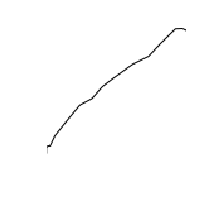

In [0]:
il[21].show()

In [0]:
# path.ls()
! ls "{trnpath}"/{outpath}

non  typ


In [0]:
# ils = il.split_by_rand_pct(valid_pct=0.2); type(ils); ils
#set seed to always get the same validation set:
ils = il.split_by_rand_pct(valid_pct=0.2, seed=42); type(ils); ils

ItemLists;

Train: ImageList (864 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png33a;

Valid: ImageList (216 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png33a;

Test: None

In [0]:
lls = ils.label_from_folder(); lls

LabelLists;

Train: LabelList (864 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png33a;

Valid: LabelList (216 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: CategoryList
non,non,non,non,non
Path: /content/gdrive/My Drive/dashlink/Train/png33a;

Test: None

In [0]:
x,y = lls.train[7]; x,y

(Image (3, 130, 133), Category typ)

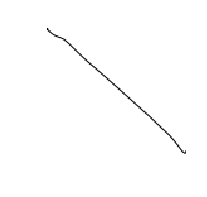

In [0]:
x.show()

In [0]:
tfms = get_transforms(do_flip=False, flip_vert=False, 
                      max_rotate=0.0, max_zoom=1, 
                      max_lighting=0, max_warp=0)

#causes valid_loss to be less than train_loss!
# tfms = get_transforms(do_flip=True, flip_vert=True, 
#                       max_rotate=90.0, max_zoom=1.1, 
#                       max_lighting=0, max_warp=0)

In [0]:
lls = lls.transform(tfms)

In [0]:
# bs = 32
bs = 8
# bs = 64

In [0]:
data = lls.databunch(bs=bs).normalize(imagenet_stats)
##data = lls.databunch(bs=bs, size=128).normalize(imagenet_stats)

In [0]:
x,y = data.train_ds[4]

Category typ

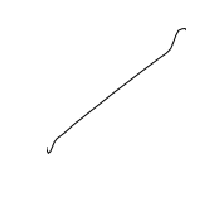

In [0]:
x.show(); y

In [0]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([8, 3, 130, 133]), torch.Size([8]))

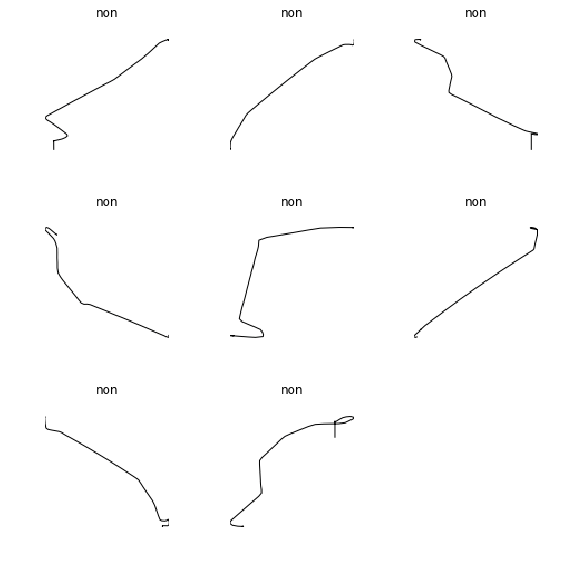

In [0]:
data.show_batch(rows=3, figsize=(8,8))

In [0]:
data.classes

['non', 'typ']

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['non', 'typ'], 2, 864, 216)

## Train model

In [0]:
# arch = models.resnet18
# arch = models.resnet34
arch = models.resnet50

In [0]:
# learn = cnn_learner(data, arch, metrics=[error_rate,accuracy])

#have ps=0, wd=0 to get train_loss < valid_loss according to:
#https://forums.fast.ai/t/validation-loss-smaller-than-training-loss/36993/4
#https://forums.fast.ai/t/validation-loss-lower-than-training-loss/4581
#https://forums.fast.ai/t/training-loss-validation-loss/39698/9
learn = cnn_learner(data, arch, 
                    metrics=[error_rate]
                    #,ps=0, wd=0, true_wd=False, bn_wd=False
                   )

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


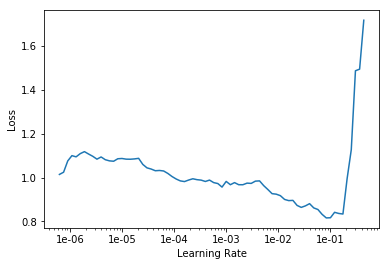

In [0]:
#learn.lr_find(start_lr=1e-07, end_lr=10)
learn.lr_find()
learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(8, slice(lrf))
# learn.fit_one_cycle(8, slice(5e-3)) #.09m
learn.fit_one_cycle(2, slice(1e-2)) #.09m

epoch,train_loss,valid_loss,error_rate,time
0,0.412314,0.489372,0.120370,00:11
1,0.265198,0.241437,0.087963,00:11


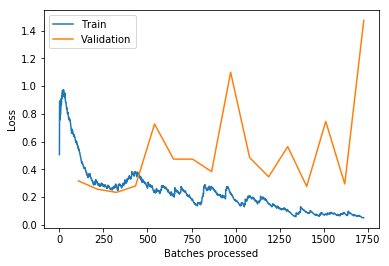

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1') #.088

In [0]:
#go back to learn.fit_one_cycle(...)

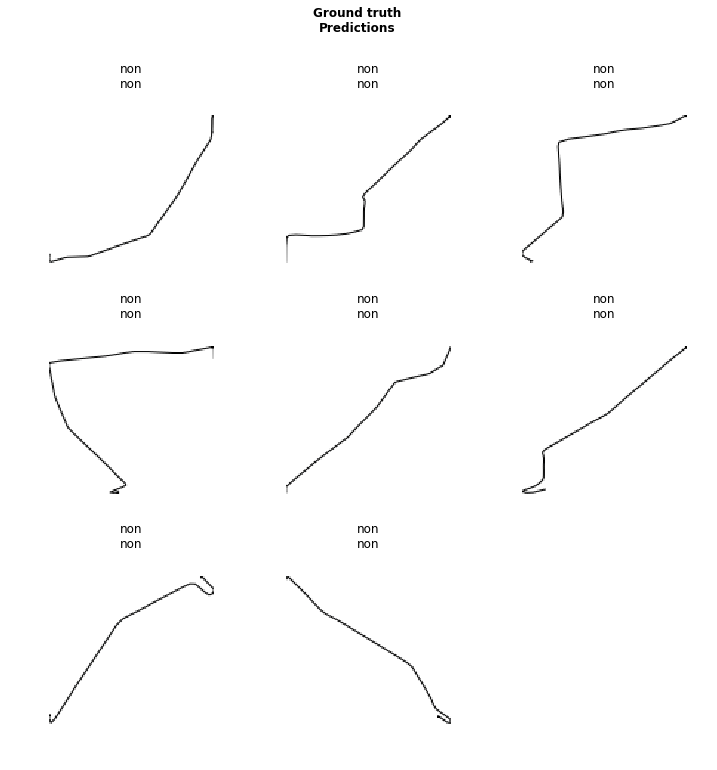

In [0]:
learn.show_results(rows=3)

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (864 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png33a;

Valid: LabelList (216 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: CategoryList
non,non,non,non,non
Path: /content/gdrive/My Drive/dashlink/Train/png33a;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


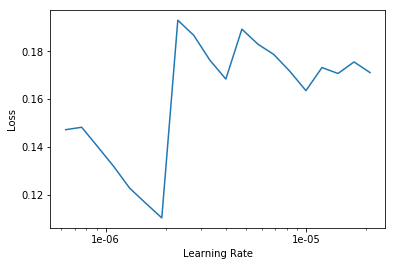

In [0]:
learn.lr_find()
# learn.lr_find(stop_div=False)
# learn.lr_find(start_lr=1e-9, end_lr=1e-0, stop_div=False)
learn.recorder.plot()

In [0]:
# lru = 1e-8 #at least an order below the minimum

In [0]:
lrf = 1e-2 #at steepest part of curve

In [0]:
# lru=1e-6, lrf/5: 108,
# lru=1e-6, lrf/10: 117,
# lru=1e-7, lrf/5: min099
# lru=1e-6, lrf/5: 
# learn.fit_one_cycle(4, slice(lru, lrf/10)) #.03,.02

learn.fit_one_cycle(1, slice(1e-5, lrf/10)) #.07m
# learn.fit_one_cycle(8, slice(1e-6, lrf/10)) #.07m
# learn.fit_one_cycle(8, slice(1e-7, lrf/10)) #.07m
# learn.fit_one_cycle(8, slice(1e-8, lrf/10)) #.06m
# learn.fit_one_cycle(8, slice(1e-9, lrf/10)) #.08m

# learn.fit_one_cycle(8, slice(1e-5, lrf/5)) #
# learn.fit_one_cycle(8, slice(1e-6, lrf/5)) #
# learn.fit_one_cycle(8, slice(1e-7, lrf/5)) #
# learn.fit_one_cycle(8, slice(1e-8, lrf/5)) #

# learn.fit_one_cycle(16, slice(1e-6, lrf/5)) #

epoch,train_loss,valid_loss,error_rate,time
0,0.098222,0.310137,0.092593,00:16


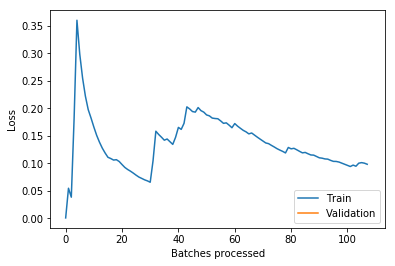

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2') #.064

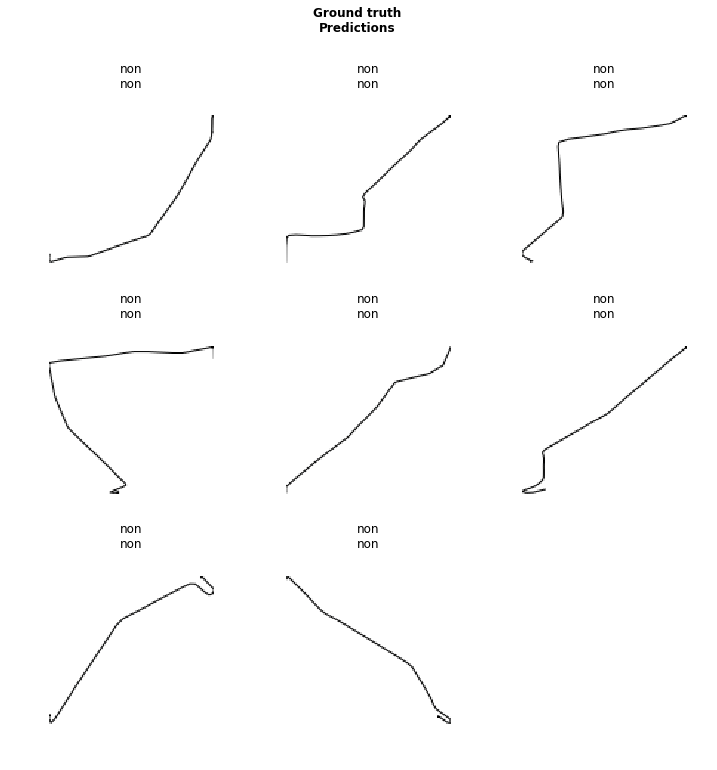

In [0]:
learn.show_results()

## Interpretation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (444 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Tail_687_1/png33a;

Valid: LabelList (110 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: CategoryList
typ,non,non,non,typ
Path: /content/gdrive/My Drive/dashlink/Tail_687_1/png33a;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

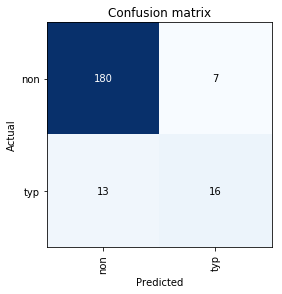

In [0]:
interp.plot_confusion_matrix() #111 items in validation set

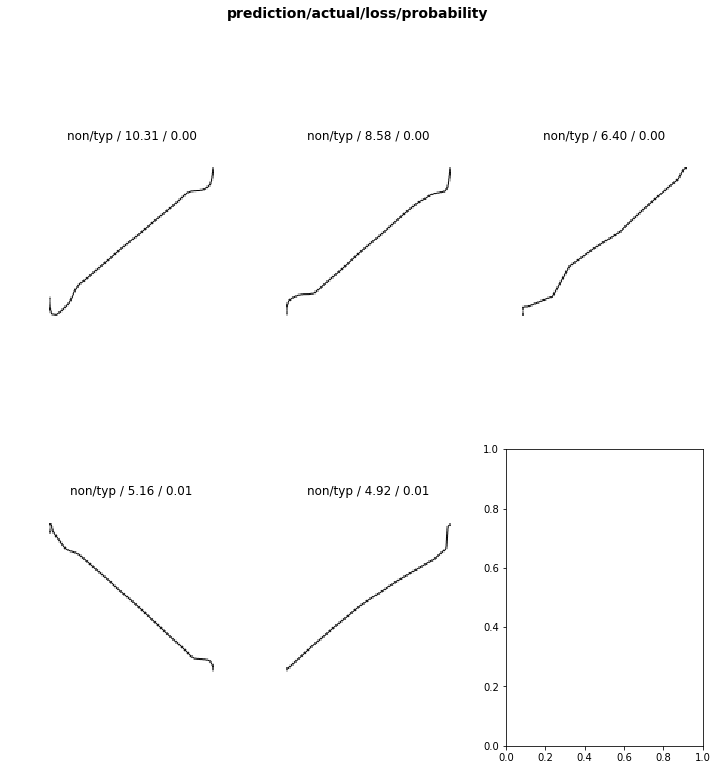

In [0]:
interp.plot_top_losses(5)

In [0]:
losses,idxs = interp.top_losses()
idxs

tensor([203, 180, 139, 167,  89, 164,  83, 107,  47, 101, 130, 114, 146, 145,
        170,  22,  61,  71, 125,   8, 110,  87, 112, 211, 155, 126, 212,  74,
         46, 182, 103, 163, 194,  37,  45, 184, 161, 149,  82,  18,  32,  21,
         98,  94,   9,   7, 179,  64,  56,  20, 135, 109, 178, 197, 113, 210,
        208,  68, 142, 177,   2,  53, 169,  95,  88,  78, 196,  72,  26, 147,
        202, 156, 186, 168, 151,  62, 199, 160, 102,  38, 132, 181,  49, 201,
         69, 204,  77,  97,  44,  13, 213, 183,  52, 108,  93, 138, 100,   3,
         11, 120, 205, 124,  41, 111,  28, 198, 214, 189,  30, 123,  65, 159,
        195, 176,  96, 153,  79,  99,  34, 152,  55,  12,  67, 175, 115,  66,
        129, 193, 117,   4,  17, 104,  73, 173,  85,  24, 148,  86,  81, 144,
        122, 200, 174,   5, 154,  23, 162,  90, 106, 118,  15, 188,  43,  80,
         25, 134, 158,  50, 187,  92,   1,   0, 137, 143, 191,  42, 215, 121,
         16,  57,  76,  60, 165, 207,  36,  10, 209, 150,  35, 1

In [0]:
top_loss_paths = data.valid_ds.x[idxs]
top_loss_paths

ImageList (216 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png33a

## Cleaning Up

In [0]:
from fastai.widgets import *

In [0]:
# db = (ImageList.from_folder(path)
db = (ImageList.from_folder(trnpath/outpath)
                   .no_split()
                   .label_from_folder()
#                   .transform(get_transforms(), size=224)
                   .transform(get_transforms(), size=133)      
                   .databunch()
     )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:180: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .no_split()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

In [0]:
#learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
# learn_cln = cnn_learner(db, models.resnet18, metrics=error_rate)

# learn_cln.load('stage-2');

In [0]:
# ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
# ImageCleaner(ds, idxs, path)
# ImageCleaner(ds, idxs, trnpath/outpath)

In [0]:
# ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [0]:
# ImageCleaner(ds, idxs, path, duplicates=True)

## Test Inference/Production (on train data)

In [0]:
learn.export()

In [0]:
!ls -altrh "{trnpath}"/{outpath}/export.pkl

-rw------- 1 root root 99M Sep  9 13:38 '/content/gdrive/My Drive/dashlink/Train/png33a/export.pkl'


In [0]:
# (path/'non').ls()
# (trnpath/outpath/'non').ls()
!ls "{trnpath}"/{outpath}/non

687200104111158-1min.png  687200108151249-1min.png  687200110141444-1min.png
687200104111441-1min.png  687200108151416-1min.png  687200110141719-1min.png
687200104111637-1min.png  687200108151600-1min.png  687200110142008-1min.png
687200104120347-1min.png  687200108151753-1min.png  687200110150550-1min.png
687200104120604-1min.png  687200108152217-1min.png  687200110150944-1min.png
687200104120922-1min.png  687200108161026-1min.png  687200110151135-1min.png
687200104121106-1min.png  687200108161629-1min.png  687200110151617-1min.png
687200104121330-1min.png  687200108161904-1min.png  687200110151831-1min.png
687200104130631-1min.png  687200108170757-1min.png  687200110160613-1min.png
687200104130953-1min.png  687200108171021-1min.png  687200110160848-1min.png
687200104131343-1min.png  687200108171238-1min.png  687200110161102-1min.png
687200104131515-1min.png  687200108171244-1min.png  687200110161409-1min.png
687200104140606-1min.png  687200108171456-1min.png  687200110161652-1min.png

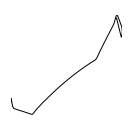

In [0]:
# img = open_image(path/'non'/'687200107241645-1min.png'); img
img = open_image(trnpath/outpath/'non'/'687200110141224-1min.png'); img

In [0]:
# learn = load_learner(path)
learn = load_learner(trnpath/outpath)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class,pred_idx,outputs

(Category non, tensor(0), tensor([9.9980e-01, 1.9716e-04]))